In [22]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df

# import os

# # Get the current working directory
# current_directory = os.getcwd()

# # Print the current working directory
# print("Current Working Directory:", current_directory)
# C:\Users\ADMIN\A Jupyter Work


Current Working Directory: C:\Users\ADMIN\A Jupyter Work


## convert sex to category

In [74]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes 

In [76]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [78]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes 

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes 

In [16]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [80]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [82]:
x = df.drop(columns='expenses')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [84]:
y =df['expenses']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split( x,y,test_size = 0.3 , random_state=0)

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [94]:
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [96]:
c = lr.intercept_

In [98]:
c

# When all the predictor variables (such as age, BMI, smoking status, number of dependents, etc.) are equal to zero, the predicted insurance cost is -11827.69.
# Since insurance costs cannot be negative, this suggests that the intercept itself might not have a meaningful real-world interpretation but rather is a result of the fitting process of the regression model.

-11827.690243440857

In [104]:
m = lr.coef_

In [106]:
m

array([  256.54688301,   -49.5556959 ,   329.03829593,   479.33098055,
       23399.22241438,  -276.24306229])

###  256.55: This could be the intercept (
###  -49.56: If this corresponds to a feature like age, this coefficient means that as age increases by one unit (e.g., one year), the insurance cost decreases by 49.56 units. Negative coefficients indicate an inverse relationship.
### 329.04: This suggests that for every one-unit increase in this feature (for example, smoking status or body mass index), the insurance cost increases by 329.04 units
### 479.33: Similarly, this coefficient might correspond to another feature like the number of claims, and every unit increase results in a 479.33 increase in insurance cost.
### 23399.22: This large coefficient could represent a binary feature, such as whether the person has a pre-existing medical condition (yes/no). A positive coefficient suggests a significant increase in insurance costs if this feature is true.
### -276.24: A negative coefficient, such as this, indicates that an increase in the associated feature leads to a decrease in insurance costs.

In [109]:
y_pre_train = lr.predict(x_train)

In [111]:
y_pre_train

array([ 2069.03359585,  8141.36511348, 18755.9087006 ,  7870.74055918,
        6319.77323677,  2023.31256548, 26863.42450343, 14926.51215619,
       10495.85929889, 16242.86056466, 11725.99370507, 11281.93339827,
       39310.00037015,  5826.58193988, 12319.08622599,  3157.93965299,
       15407.40958383,  4638.61198466,  5019.75698033,  6017.49314695,
       15364.9402173 ,  8973.68891998,  8767.32720772, 34224.46402602,
        6693.75646855, 26942.08473102, 27280.87272357, 15486.58742309,
        8811.58410991, 34400.26712291, 10167.16501979,  3890.92199565,
       15617.85872463, 29573.33802913, 29452.02427532, 28118.40509054,
       10015.30321546, 33055.63888237,  3963.91622151, 25447.54101793,
        5661.55997897, 27993.48459099,  7049.83736756, 15106.48019776,
        2569.47001823, 35456.58856451, 15254.19868735,  3190.8761776 ,
        1785.54434704, 10139.73090613,  9948.63660039, 11220.24742389,
       16775.5017179 ,  4325.19567694,  1904.54981552,  4172.84106372,
      

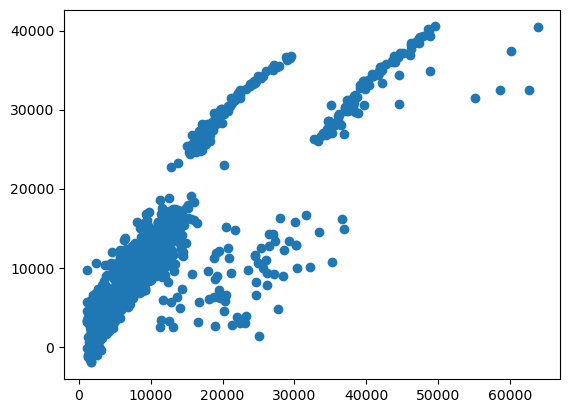

In [113]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pre_train)

In [115]:
x_train

,age,sex,bmi,children,smoker,region
1163,18,0,28.2,0,0,0
196,39,0,32.8,0,0,3
438,52,0,46.8,5,0,2
183,44,0,26.4,0,0,1
1298,33,1,27.5,2,0,1
...,...,...,...,...,...,...
763,27,1,26.0,0,0,0
835,42,1,36.0,2,0,2
1216,40,1,25.1,0,0,2
559,19,1,35.5,0,0,1


In [117]:
x_test

,age,sex,bmi,children,smoker,region
578,52,1,30.2,1,0,3
610,47,0,29.4,1,0,2
569,48,1,40.6,2,1,1
1034,61,1,38.4,0,0,1
198,51,0,18.1,0,0,1
...,...,...,...,...,...,...
1261,28,1,37.1,1,0,3
494,21,1,25.7,4,1,3
97,55,1,38.3,0,0,2
418,64,1,39.2,1,0,2


Text(0, 0.5, 'Predicted Charges')

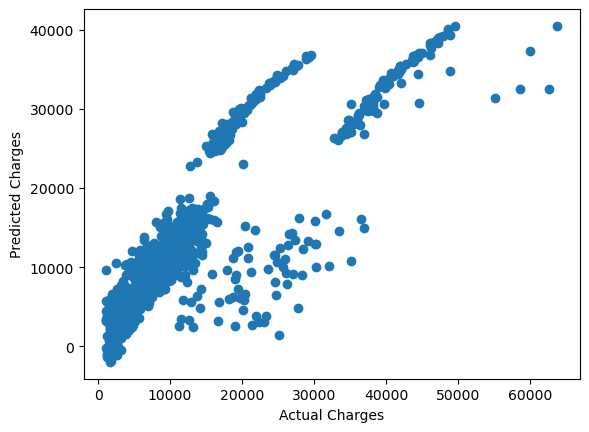

In [119]:
import matplotlib.pylab as plt 
plt.scatter(y_train,y_pre_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

### how to look prediction is good or not that good with (r-sqaure) or (r2-score)

In [122]:
from sklearn.metrics import r2_score

In [124]:
r2_score(y_train,y_pre_train)

0.7306860719626136

### explain about r2_score = 0.73
### R2--score = 0.73: This means that 73% of the variance in the target variable (e.g., insurance cost) is explained by the features in your model.
### 27% of the variance is still unexplained by the model, indicating room for improvement.

### basic r2-score explaination
### R² = 1: Perfect model. The model explains 100% of the variance in the data.
### R² = 0: The model does not explain any variance in the data. This is equivalent to predicting the mean of the target variable for all inputs.
### R² < 0: The model performs worse than simply predicting the mean.

In [134]:
y_pre_test = lr.predict(x_test)

In [130]:
y_pre_test

array([11050.75030786,  9830.58401425, 37877.60057293, 16130.94142557,
        6935.55088408,  3886.76761583,  1443.86083359, 14394.94464116,
        9019.79772728,  7470.54831663,  4584.62434316, 10302.87615916,
        8692.67256789,  4081.50136233, 27550.09068791, 11164.04066927,
       11234.95457001,  5966.04861706,  8194.77658449, 26754.38982015,
       33448.43614635, 14342.84850626, 11680.03101722, 32224.0141746 ,
        4335.79376459,  9084.71373556,  1047.98500037, 10177.9556596 ,
        4029.06121061, 10385.45072068,  9039.33404941, 40108.56139118,
       15505.96388808, 13677.23187741, 24473.94242967,  5048.8847032 ,
       12899.34942003, 30332.8849647 , 33308.28249653,  3431.49348423,
        3955.85963387,  4190.29599971, 30213.91592489, 39258.53153771,
       27778.4030602 ,  5001.76547535, 11032.4253509 ,  7754.51824821,
        3553.9859082 , 10619.24604637,  5556.3245936 ,  3388.61886944,
       32699.90093916, 38300.73692497, 16286.24744589,  6954.02246071,
      

Text(0, 0.5, 'Predicted Charges')

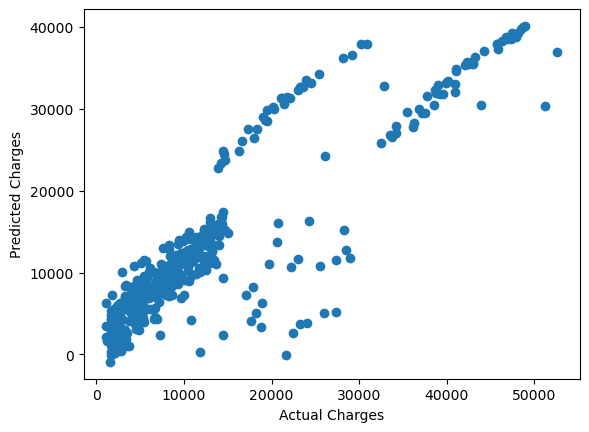

In [136]:
import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pre_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")


In [138]:
r2_score(y_test,y_pre_test)

0.791151983192236